In [2]:
import numpy as np
import util
import matplotlib.pyplot as plt

from linear_model import LinearModel

In [3]:
ds1_training_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds1_train.csv'
ds1_valid_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds1_valid.csv'
ds2_training_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds2_train.csv'
ds2_valid_set_path = '/home/kev/Documents/cs229/cs229-2018-autumn/problem-sets/PS1/data/ds2_valid.csv'


In [4]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

[[  1.           2.91180854  60.35961272]
 [  1.           3.77474554 344.1492843 ]
 [  1.           2.61548828 178.22208681]
 ...
 [  1.           2.96909526  20.24997848]
 [  1.           3.95753102  27.26196973]
 [  1.           4.02533402  12.23316511]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

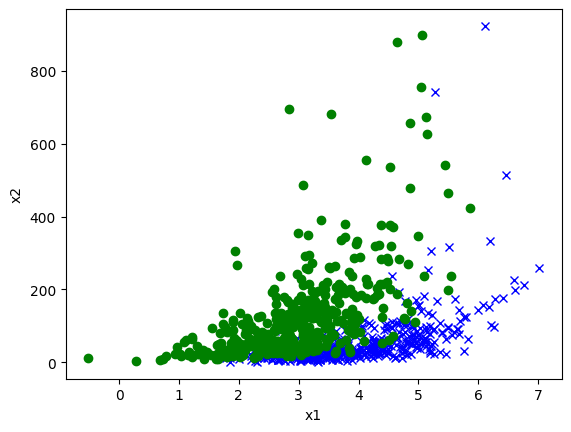

In [35]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], 'bx', linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], "go", linewidth=2)

In [5]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        def h(theta,x):
            """
            m = numbe of training examples 
            n = number of feaures 
            logit where theta are the params wiht shape (n,) 
            x are the inputs with shape (m.n)
            h = (thetaT.x)
            """
            z = np.dot(x, theta) ## make sure the shapes are right X= (mxn) theta = (nx1)
            sigmoid = 1 / (1 + np.exp(-z))
            return sigmoid 
        
        def gradient(theta,y,x):
            hypothesis = h(theta,x)
            m,_ = x.shape
            ##using the equation 1/m * XT(h-y) were XT is the input matrix transposed and y are the ouput values 
            return 1/m * np.dot(x.T,(y-hypothesis))
        
        def Hessian(theta, x):
            S = np.dot(h(theta, x), (1-h(theta,x)))
            m,_ = x.shape
            return 1/m * (x.T * S * (1 - S)).dot(x)

        
        def next_theta(theta, x, y):
            f = gradient(theta,y,x)
            hes = Hessian(theta,x)
            return theta - np.dot(np.linalg.inv(hes),f)
        
        m,n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)
        old_theta = self.theta 
        new_theta = next_theta(old_theta, x, y)
        while(np.linalg.norm((new_theta - old_theta),1) >= self.eps):
            old_theta = new_theta 
            new_theta = next_theta(old_theta,x,y)
        
        self.theta = new_theta 
        
    def predict(self, x):
        """Make a prediction given new inputs x.
        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        
        x.self.theta the transformes input data x base on the learned feature vector theta 
        """
        probabilities = 1 / (1 + np.exp(-np.dot(x, self.theta)))
        return probabilities >= 0.5  # Applying threshold to convert probabilities to binary labels


In [6]:
log_reg  = LogisticRegression(eps=1e-5)
log_reg.fit(x_train, y_train)

KeyboardInterrupt: 

Theta is:  [-3.70208783  1.36889057 -0.01233273]
The accuracy on training set is:  0.0


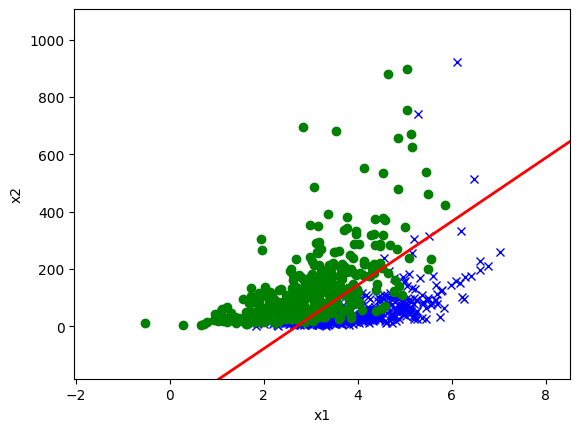

In [ ]:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))

The accuracy on validation set is:  0.0


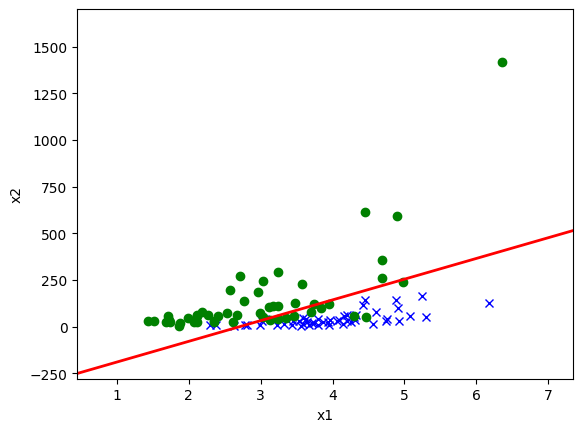

In [ ]:
util.plot(x_valid, y_valid, log_reg.theta)
print("The accuracy on validation set is: ", np.mean(log_reg.predict(x_valid) == y_valid))